In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.morphology import erosion, disk, square, closing, opening
from skimage.filters import prewitt
import math
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from skimage import color, io, measure, segmentation, img_as_ubyte
from skimage.util import img_as_float, img_as_uint
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from skimage.color import label2rgb
from scipy.spatial import distance
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import matrix_transform
from skimage import io, color, morphology
import glob
from sklearn.decomposition import PCA
from sklearn import decomposition
#import LDA as LDA
import os
import scipy.io as sio
DATA_PATH = '../data_test/1-131/'

In [3]:
ct_dicom = dicom.read_file(DATA_PATH + "1-131.dcm")
ct_img = ct_dicom.pixel_array

In [4]:
#Making masks for bone, spleen, liver as a function for later use
def get_mask_vals(in_dir, roi):
    temp_roi = io.imread(in_dir + roi)
# convert to boolean image
    temp_mask = temp_roi > 0
    temp_values = ct_img[temp_mask]
    return temp_values

In [9]:
bone_values = get_mask_vals(DATA_PATH, "BoneROI.png")
liver_values = get_mask_vals(DATA_PATH, "LiverRoi.png")
spleen_values = get_mask_vals(DATA_PATH, "spleenRoi.png")
mu_bone = np.mean(bone_values)
mu_liver = np.mean(liver_values)
mu_spleen = np.mean(spleen_values)
print(mu_bone, mu_liver, mu_spleen)
range = [(mu_spleen + mu_liver)/2, (mu_spleen + mu_bone)/2]

838.4418604651163 73.28221208665906 124.72452830188679


In [10]:
range

[99.00337019427292, 481.58319438350156]

In [11]:
t1 = 85
t2 = 400
ct_img_thresholded = (ct_img > t1) & (ct_img < t2)

In [28]:
footprint_ct = disk(5)
closed_ct = closing(ct_img_thresholded, footprint_ct)
footprint_ct = disk(3)
opened_ct = opening(closed_ct, footprint_ct)
labels = measure.label(opened_ct, connectivity=2)


region_props = measure.regionprops(labels)
max_area = 4000
min_area = 1000
count = 0
for region in region_props:
    if region.area < max_area and region.area > min_area:
        # set the pixels in the invalid areas to background
        count += 1
        #for cords in region.coords:
            #label_img_filter[cords[0], cords[1]] = 0
count

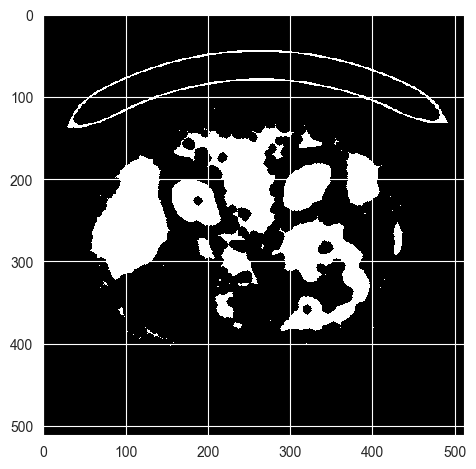

In [24]:
io.imshow(opened_ct)